# Analysis and Prediction GMSL

## CO2 Dataset (https://datahub.io/core/co2-ppm)

Za naše potrebe iskoristićemo skup podataka u kome se pored datuma u kom je izvršeno merenje nalazi podatak o prosečnoj mesečnoj molskoj frakciji CO2 određenoj iz dnevnih proseka. Meseci koji nedostaju su označeni sa -99.99

Podatak koji je od interesa za naš rad je:

* Average - prosečna koncentracija CO2 na mesečnom nivou

In [27]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('original_datasets/co2-mm-mlo_csv.csv', delimiter=';')

In [29]:
df.head()

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1


In [30]:
df.columns

Index(['Date', 'Decimal Date', 'Average', 'Interpolated', 'Trend',
       'Number of Days'],
      dtype='object')

#### Uklanjanje kolona koje nisu od interesa.

In [31]:
df.drop(['Decimal Date', 'Interpolated', 'Trend', 'Number of Days'], axis = 1, inplace = True)

In [32]:
df.rename(columns={'Average':'CO2'}, inplace = True)

In [33]:
df.describe()

,CO2
count,727.000000
mean,349.555846
std,52.068588
min,-99.990000
25%,328.425000
50%,351.310000
75%,375.700000
max,411.240000


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    727 non-null    object 
 1   CO2     727 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.5+ KB


#### Konvertovanje datuma iz stringa u datetime

In [35]:
df['Date'] = pd.to_datetime(df['Date'])

In [36]:
df.head()

,Date,CO2
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,-99.99
4,1958-07-01,315.86


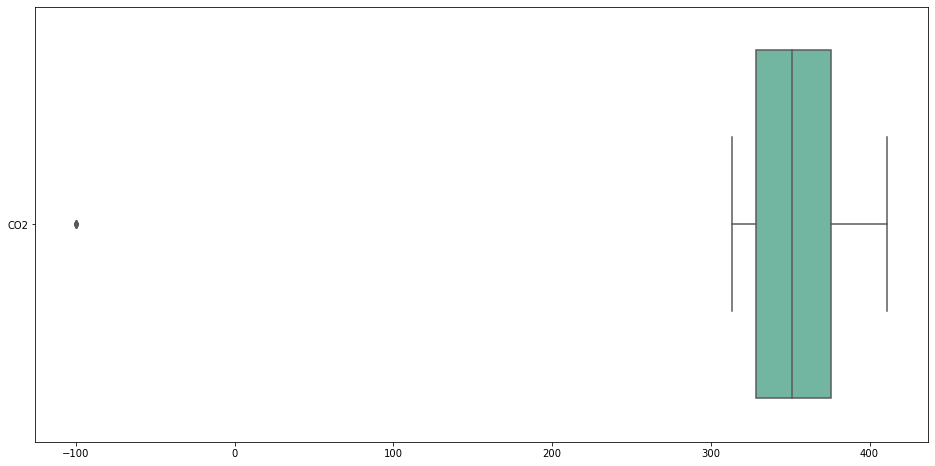

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sb.boxplot(data=df, orient="h", palette="Set2")

<AxesSubplot:>

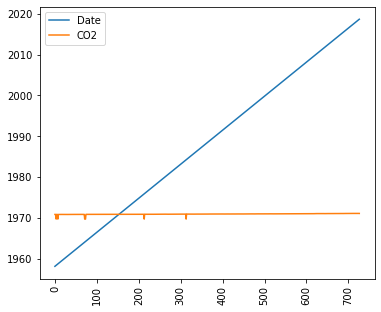

In [38]:
df.plot(x_compat=True, rot=90, figsize=(6, 5))

In [39]:
df.shape

(727, 2)

In [40]:
df.nunique()

Date    727
CO2     696
dtype: int64

#### Pošto skup podataka ima 727 redova, a rezultat nunique vraća da takođe postoji 727 različitih Date, zaključujemo da ne postoje duplikati.

In [43]:
df['Date'] = df['Date'].dt.strftime('%Y-%m')

In [44]:
df.head()

,Date,CO2
0,1958-03,315.71
1,1958-04,317.45
2,1958-05,317.50
3,1958-06,-99.99
4,1958-07,315.86


In [45]:
df.to_csv('processed_datasets/CO2.csv', index = False)